In [83]:
# import necessary libraries
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime



In [84]:
# define a function to read a CSV file
def read_csv(file_path):
    return pd.read_csv(file_path)


In [85]:
# convert the date string to a datetime object
def convert_df_col_to_datetime_object(df_column, format='%d %b %Y'):
    return pd.to_datetime(df_column, format=format)


In [86]:
# calculate the frequency of rows based on the date column
def calc_connections_made_freq(df_column):
    return df_column.value_counts()


In [87]:
# define a function to create a line plot using seaborn
def lineplot_seaborn(df, x, y, xlabel, ylabel, title, format):
    sns.set_style('darkgrid')

    # create a line plot using seaborn
    sns.lineplot(data=df, x=x, y=y)

    # set the x-axis label
    plt.xlabel(xlabel)

    # set the y-axis label
    plt.ylabel(ylabel)

    # set the title
    plt.title(title)

    # format x-axis tick labels as month-day
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(format))

    # display the plot
    plt.show()


In [88]:
def plot_piechart(df, fontsize=12):

    fig, ax = plt.subplots()
    labels = [f"{m} ({c})" for m, c in zip(df['date'],
                                           df['connections_made'])]  # add count to label

    df.plot(kind='pie', y='connections_made', labels=labels,
            ax=ax, autopct='%1.1f%%', startangle=90, counterclock=False)

    # Add legend outside the pie chart
    plt.legend(bbox_to_anchor=(1.1, 1.05))

    # df.plot(kind='pie', y='value', labels=df['date'], ax=ax, autopct='%1.1f%%')
    ax.set_aspect('equal')
    ax.set_ylabel('')

    # show total count
    total_count = df['connections_made'].sum()
    ax.text(0, -1.2, f"Total Count: {total_count}",
            ha='center', va='center', fontsize=fontsize)

    plt.show()


In [105]:
def plot_barchart(df, x, y, xlabel, ylabel, alltime=False, month_year=False):
    # create a bar plot
    ax = sns.barplot(data=df, x=x, y=y)

    # set x-label and y-label
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


    if(alltime):
        plt.gca().set(xticks=[])

 
    if(month_year):
        new_labels = df[x].values
        new_labels = [p.to_timestamp().strftime('%B')[0:3] for p in new_labels]

        ax.set_xticklabels(new_labels)

    # show the plot
    plt.show()


In [90]:
# read in the CSV file
raw_df = read_csv('./data/connections.csv')


In [91]:
raw_df['connected_on'] = convert_df_col_to_datetime_object(
    raw_df['connected_on'])
print(raw_df.head)


<bound method NDFrame.head of      connected_on
0      2023-03-29
1      2023-03-29
2      2023-03-27
3      2023-03-22
4      2023-03-19
...           ...
4182   2019-05-22
4183   2019-05-22
4184   2019-05-15
4185   2019-05-15
4186   2019-05-15

[4187 rows x 1 columns]>


In [92]:
connection_freq_wrt_date = calc_connections_made_freq(raw_df['connected_on'])
print(connection_freq_wrt_date)


2020-06-09    91
2021-11-09    80
2020-06-10    76
2020-04-16    64
2020-06-08    63
              ..
2021-12-25     1
2021-12-06     1
2020-08-20     1
2020-08-22     1
2021-04-20     1
Name: connected_on, Length: 897, dtype: int64


In [93]:
# create a new DataFrame with the date and connection frequency data
connections_daily_df = pd.DataFrame(
    {'date': connection_freq_wrt_date.index, 'connections_made': connection_freq_wrt_date.values})
print(connections_daily_df)


          date  connections_made
0   2020-06-09                91
1   2021-11-09                80
2   2020-06-10                76
3   2020-04-16                64
4   2020-06-08                63
..         ...               ...
892 2021-12-25                 1
893 2021-12-06                 1
894 2020-08-20                 1
895 2020-08-22                 1
896 2021-04-20                 1

[897 rows x 2 columns]


In [94]:
# group the DataFrame by month and year and count the occurrences in each group
connections_monthly_df = connections_daily_df.groupby(
    connections_daily_df['date'].dt.to_period('M')).sum(numeric_only=True)

# reset the index to include the year and month columns
connections_monthly_df = connections_monthly_df.reset_index()
print(connections_monthly_df)


       date  connections_made
0   2019-05                67
1   2019-06                60
2   2019-07                11
3   2019-08                12
4   2019-09                 6
5   2019-10                 8
6   2019-11                 3
7   2019-12                18
8   2020-01                12
9   2020-02               138
10  2020-03                48
11  2020-04               230
12  2020-05                94
13  2020-06               619
14  2020-07               202
15  2020-08                92
16  2020-09               121
17  2020-10               111
18  2020-11                90
19  2020-12                78
20  2021-01                65
21  2021-02                77
22  2021-03                50
23  2021-04                85
24  2021-05                38
25  2021-06               108
26  2021-07               162
27  2021-08                95
28  2021-09               126
29  2021-10               203
30  2021-11               484
31  2021-12               111
32  2022-0

In [95]:
# group the DataFrame by year and count the occurrences in each group
connections_yearly_df = connections_daily_df.groupby(
    connections_daily_df['date'].dt.to_period('Y')).sum(numeric_only=True)

# reset the index to include the year column
connections_yearly_df = connections_yearly_df.reset_index()
print(connections_yearly_df)


   date  connections_made
0  2019               185
1  2020              1835
2  2021              1604
3  2022               497
4  2023                66


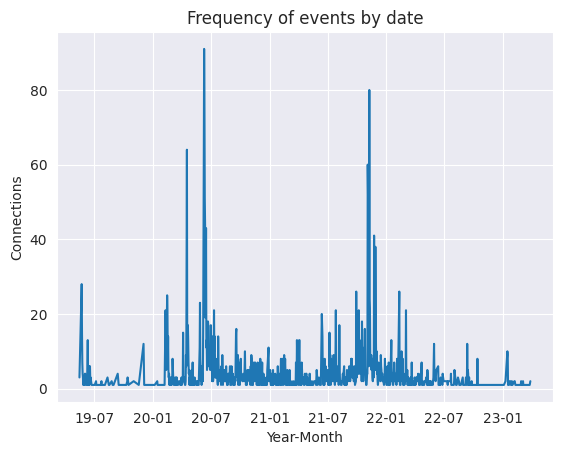

In [96]:
# create a line plot of the daily connection frequency
lineplot_seaborn(connections_daily_df, 'date', 'connections_made',
                 'Year-Month', 'Connections', 'Frequency of events by date', '%y-%m')


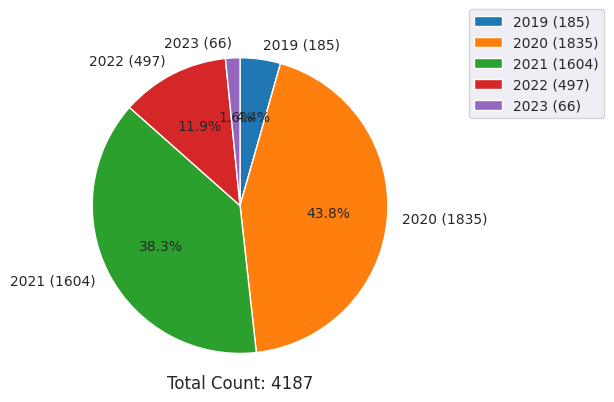

In [97]:
plot_piechart(connections_yearly_df)


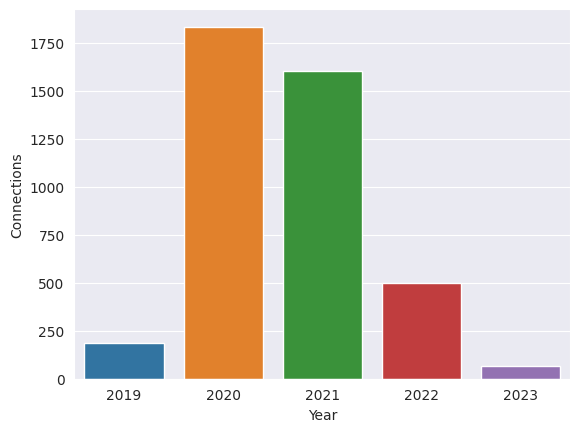

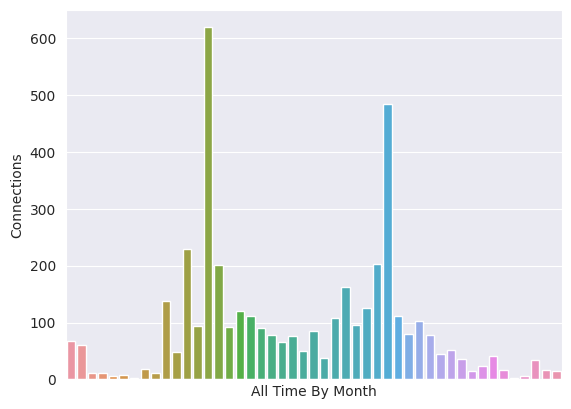

In [98]:
plot_barchart(connections_yearly_df, 'date',
              'connections_made', 'Year', 'Connections')
plot_barchart(connections_monthly_df, 'date',
              'connections_made', 'All Time By Month', 'Connections', True)


In [99]:
# Create sub-DataFrames for each year
sub_dfs = {}
for year in connections_monthly_df['date'].dt.year.unique():
    sub_dfs[year] = connections_monthly_df[connections_monthly_df['date'].dt.year == year]

# Access sub-DataFrame for a specific year
sub_dfs

{2019:       date  connections_made
 0  2019-05                67
 1  2019-06                60
 2  2019-07                11
 3  2019-08                12
 4  2019-09                 6
 5  2019-10                 8
 6  2019-11                 3
 7  2019-12                18,
 2020:        date  connections_made
 8   2020-01                12
 9   2020-02               138
 10  2020-03                48
 11  2020-04               230
 12  2020-05                94
 13  2020-06               619
 14  2020-07               202
 15  2020-08                92
 16  2020-09               121
 17  2020-10               111
 18  2020-11                90
 19  2020-12                78,
 2021:        date  connections_made
 20  2021-01                65
 21  2021-02                77
 22  2021-03                50
 23  2021-04                85
 24  2021-05                38
 25  2021-06               108
 26  2021-07               162
 27  2021-08                95
 28  2021-09               1

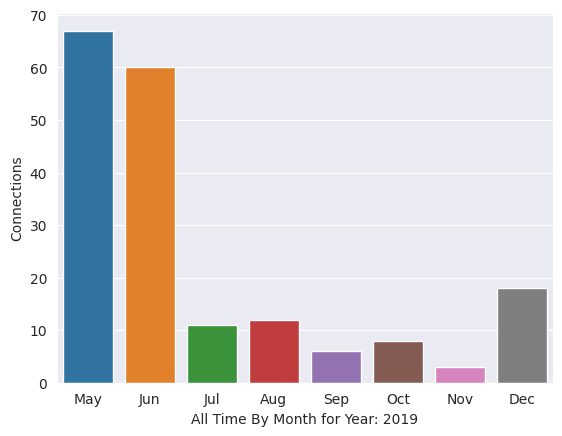

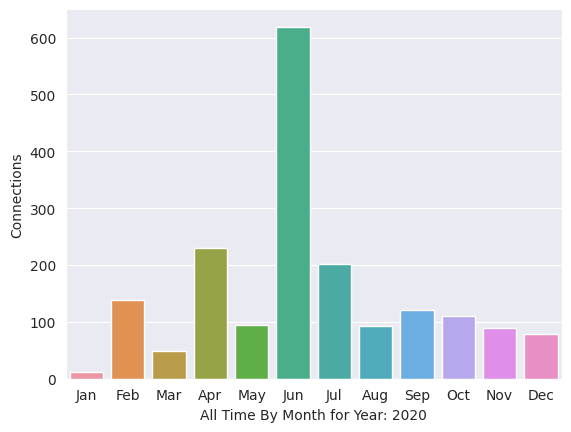

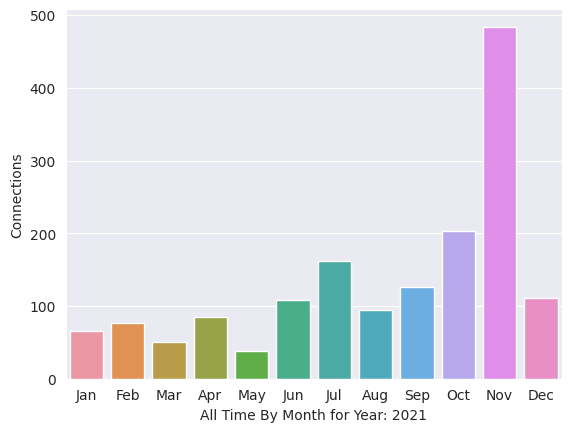

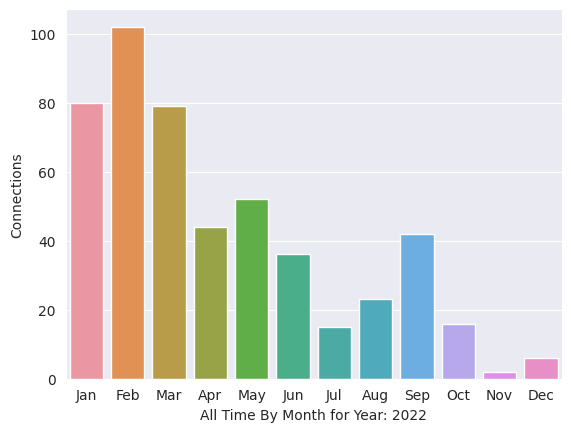

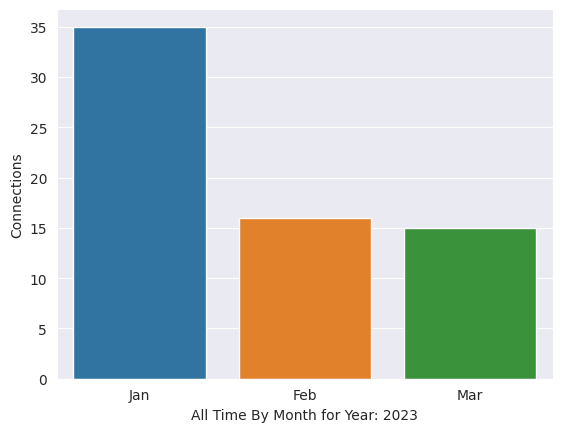

In [106]:
for year in sub_dfs:
    plot_barchart(sub_dfs[year], 'date',
              'connections_made', f"All Time By Month for Year: {year}", 'Connections', False, True)
   